In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import cartopy.crs as ccrs
import glob

import xclim

In [2]:
def global_mean(ds):
    lat = ds['lat']
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

In [3]:
ds_solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/pr/gn/latest/*')
ds_sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/pr/gn/latest/*')
ds_G1 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/day/pr/gn/latest/*')
ds_585 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/pr/gn/latest/*')
ds_245 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/day/pr/gn/latest/*')
pi_control = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/day/pr/gn/latest/*').isel(time=slice(0,28800))

In [4]:
cwd_solar = xclim.indicators.icclim.CWD(pr = ds_solar.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_sulfur = xclim.indicators.icclim.CWD(pr = ds_sulfur.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_g1 = xclim.indicators.icclim.CWD(pr = ds_G1.sel(time = slice('1870-01-01','1949-12-30')).pr)
cwd_585 = xclim.indicators.icclim.CWD(pr = ds_585.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_245 = xclim.indicators.icclim.CWD(pr = ds_245.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_control = xclim.indicators.icclim.CWD(pr = pi_control.pr)

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a 

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_exec

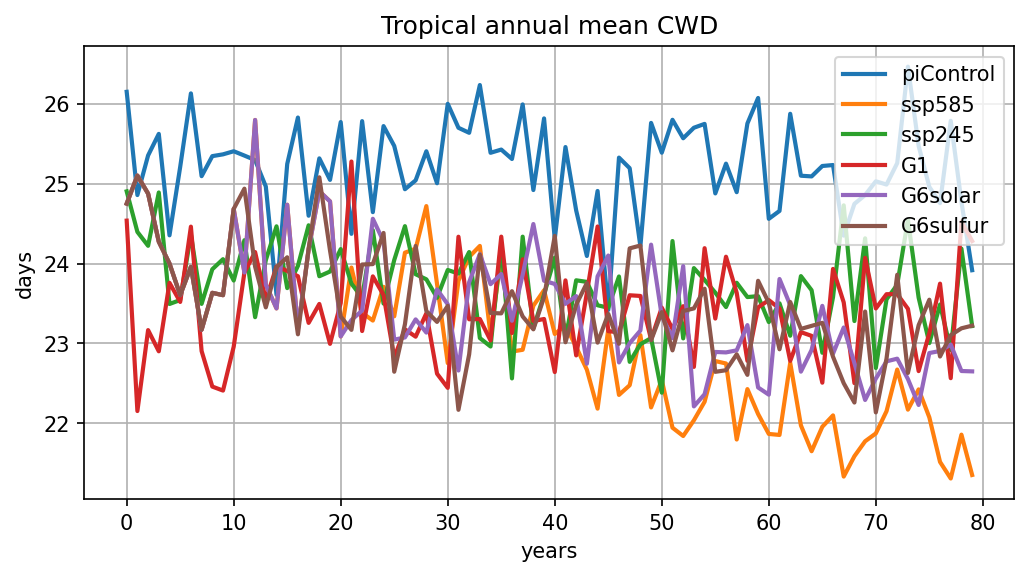

In [5]:
plt.figure(figsize=(8, 4),dpi=150)
plt.plot(global_mean(cwd_control.sel(lat=slice(-20,20))).values,lw=2,label='piControl')
plt.plot(global_mean(cwd_585.sel(lat=slice(-20,20))).values,lw=2,label='ssp585')
plt.plot(global_mean(cwd_245.sel(lat=slice(-20,20))).values,lw=2,label='ssp245')
plt.plot(global_mean(cwd_g1.sel(lat=slice(-20,20))).values,lw=2,label='G1')
plt.plot(global_mean(cwd_solar.sel(lat=slice(-20,20))).values,lw=2,label='G6solar')
plt.plot(global_mean(cwd_sulfur.sel(lat=slice(-20,20))).values,lw=2,label='G6sulfur')
plt.grid()
#plt.ylim([14,22])
plt.ylabel('days')
plt.xlabel('years')
plt.legend()
plt.title('Tropical annual mean CWD')

plt.show()

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_exec

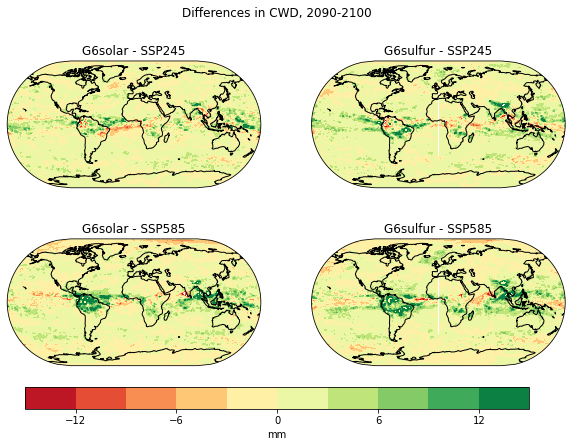

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), subplot_kw={'projection': ccrs.EckertIII()})
cf1 = axs[0,0].contourf(cwd_solar.lon, cwd_solar.lat, cwd_solar.sel(time = slice('2090','2099')).mean('time')-cwd_245.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-15,15,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,0].coastlines()
axs[0,0].set_global()
axs[0,0].set_title("G6solar - SSP245")
cf2 = axs[0,1].contourf(cwd_sulfur.lon, cwd_sulfur.lat, cwd_sulfur.sel(time = slice('2090','2099')).mean('time')-cwd_245.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-15,15,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,1].coastlines()
axs[0,1].set_global()
axs[0,1].set_title("G6sulfur - SSP245")
cf3 = axs[1,0].contourf(cwd_solar.lon, cwd_solar.lat, cwd_solar.sel(time = slice('2090','2099')).mean('time')-cwd_585.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-15,15,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,0].coastlines()
axs[1,0].set_global()
axs[1,0].set_title("G6solar - SSP585")
cf4 = axs[1,1].contourf(cwd_sulfur.lon, cwd_sulfur.lat, cwd_sulfur.sel(time = slice('2090','2099')).mean('time')-cwd_585.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-15,15,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,1].coastlines()
axs[1,1].set_global()
axs[1,1].set_title("G6sulfur - SSP585")
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
fig.colorbar(cf1, orientation='horizontal', label="mm", cax=cbar_ax)
fig.suptitle("Differences in CWD, 2090-2100")

plt.show()

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


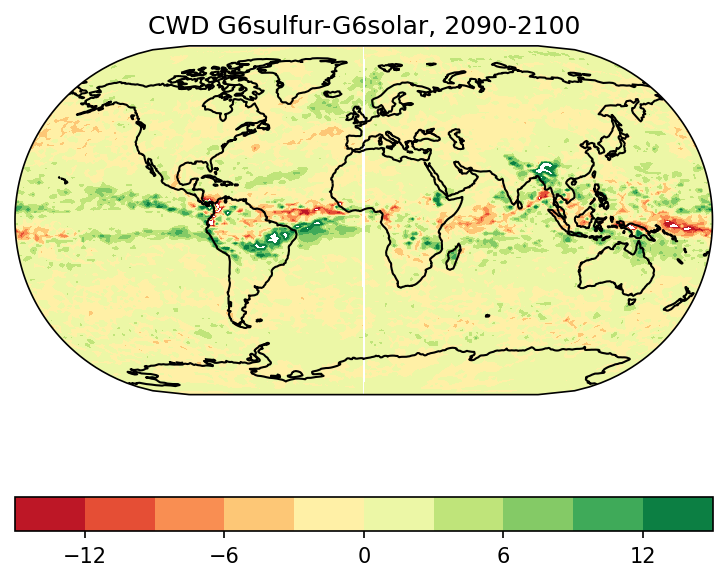

In [35]:
fig = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(cdd_sulfur.lon, cwd_sulfur.lat, cwd_sulfur.sel(time = slice('2090','2099')).mean('time')-cwd_solar.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-15,15,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
fig.colorbar(filled_c, orientation='horizontal')
ax.coastlines()
ax.set_global()
fig.colorbar(cf1, orientation='horizontal', label="mm", cax=cbar_ax)
plt.title('CWD G6sulfur-G6solar, 2090-2100')

plt.show()

In [7]:
r20_solar = xclim.indicators.icclim.R20mm(pr = ds_solar.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_sulfur = xclim.indicators.icclim.R20mm(pr = ds_sulfur.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_g1 = xclim.indicators.icclim.R20mm(pr = ds_G1.sel(time = slice('1870-01-01','1949-12-30')).pr)
r20_585 = xclim.indicators.icclim.R20mm(pr = ds_585.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_245 = xclim.indicators.icclim.R20mm(pr = ds_245.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_control = xclim.indicators.icclim.R20mm(pr = pi_control.pr)

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a 

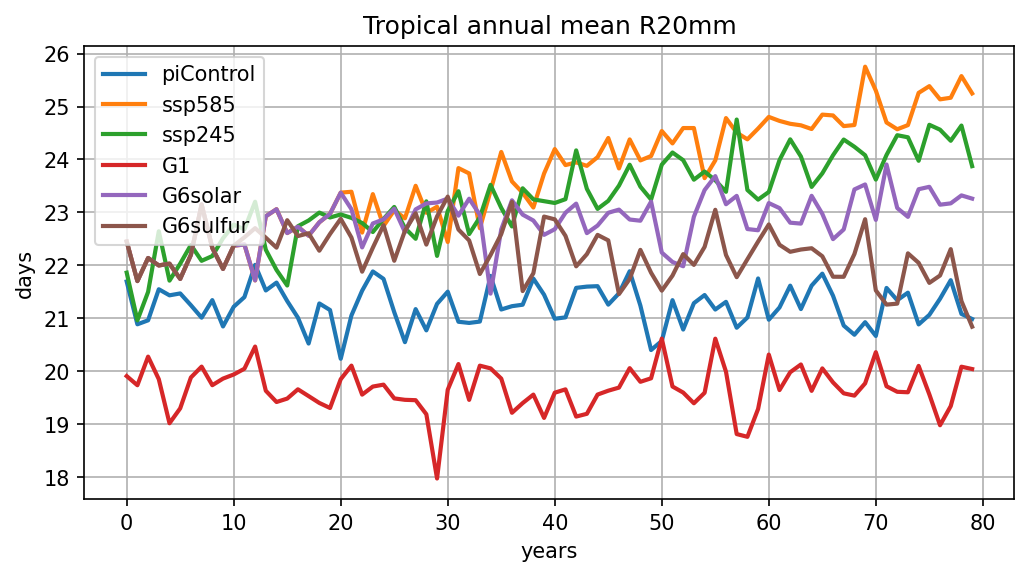

In [8]:
plt.figure(figsize=(8, 4),dpi=150)
plt.plot(global_mean(r20_control.sel(lat=slice(-20,20))).values,lw=2,label='piControl')
plt.plot(global_mean(r20_585.sel(lat=slice(-20,20))).values,lw=2,label='ssp585')
plt.plot(global_mean(r20_245.sel(lat=slice(-20,20))).values,lw=2,label='ssp245')
plt.plot(global_mean(r20_g1.sel(lat=slice(-20,20))).values,lw=2,label='G1')
plt.plot(global_mean(r20_solar.sel(lat=slice(-20,20))).values,lw=2,label='G6solar')
plt.plot(global_mean(r20_sulfur.sel(lat=slice(-20,20))).values,lw=2,label='G6sulfur')
plt.grid()
#plt.ylim([14,22])
plt.ylabel('days')
plt.xlabel('years')
plt.legend()
plt.title('Tropical annual mean R20mm')

plt.show()

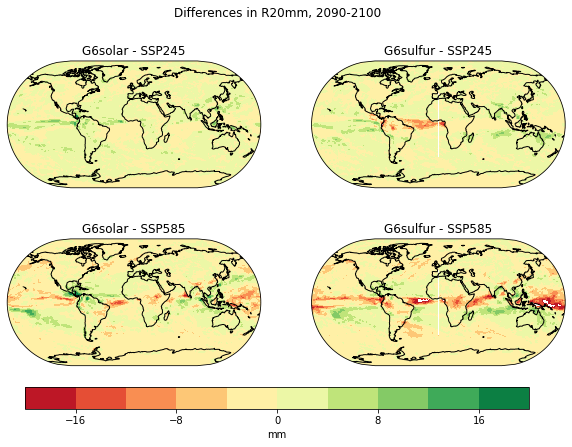

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), subplot_kw={'projection': ccrs.EckertIII()})
cf1 = axs[0,0].contourf(r20_solar.lon, r20_solar.lat, r20_solar.sel(time = slice('2090','2099')).mean('time')-r20_245.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-20,20,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,0].coastlines()
axs[0,0].set_global()
axs[0,0].set_title("G6solar - SSP245")
cf2 = axs[0,1].contourf(r20_sulfur.lon, r20_sulfur.lat, r20_sulfur.sel(time = slice('2090','2099')).mean('time')- r20_245.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-20,20,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,1].coastlines()
axs[0,1].set_global()
axs[0,1].set_title("G6sulfur - SSP245")
cf3 = axs[1,0].contourf(r20_solar.lon, r20_solar.lat, r20_solar.sel(time = slice('2090','2099')).mean('time')-r20_585.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-20,20,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,0].coastlines()
axs[1,0].set_global()
axs[1,0].set_title("G6solar - SSP585")
cf4 = axs[1,1].contourf(r20_sulfur.lon, r20_sulfur.lat, r20_sulfur.sel(time = slice('2090','2099')).mean('time')-r20_585.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-20,20,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,1].coastlines()
axs[1,1].set_global()
axs[1,1].set_title("G6sulfur - SSP585")
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
fig.colorbar(cf1, orientation='horizontal', label="mm", cax=cbar_ax)
fig.suptitle("Differences in R20mm, 2090-2100")


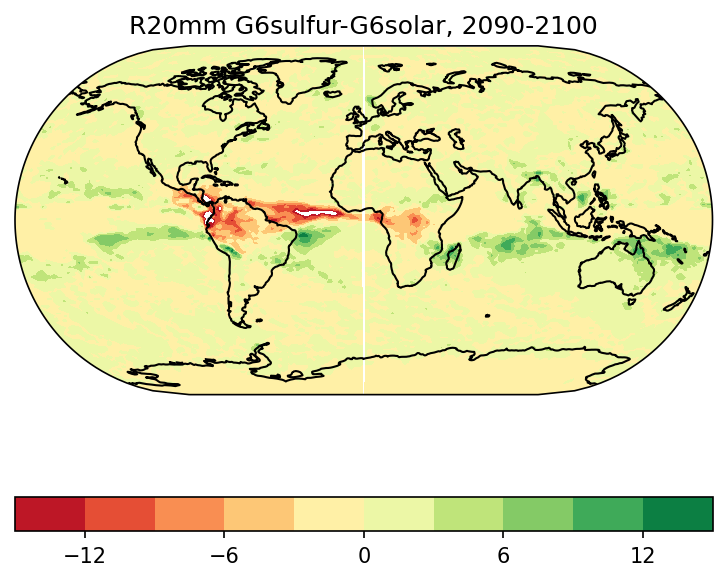

In [37]:
fig = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(cdd_sulfur.lon, r20_sulfur.lat, r20_sulfur.sel(time = slice('2090','2099')).mean('time')-r20_solar.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-15,15,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
fig.colorbar(filled_c, orientation='horizontal')
ax.coastlines()
ax.set_global()
fig.colorbar(cf1, orientation='horizontal', label="mm", cax=cbar_ax)
plt.title('R20mm G6sulfur-G6solar, 2090-2100')

plt.show()

In [13]:
cdd_solar = xclim.indicators.icclim.CDD(pr = ds_solar.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_sulfur = xclim.indicators.icclim.CDD(pr = ds_sulfur.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_g1 = xclim.indicators.icclim.CDD(pr = ds_G1.sel(time = slice('1870-01-01','1949-12-30')).pr)
cdd_585 = xclim.indicators.icclim.CDD(pr = ds_585.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_245 = xclim.indicators.icclim.CDD(pr = ds_245.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_picontrol = xclim.indicators.icclim.CDD(pr = pi_control.pr)

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a 

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_exec

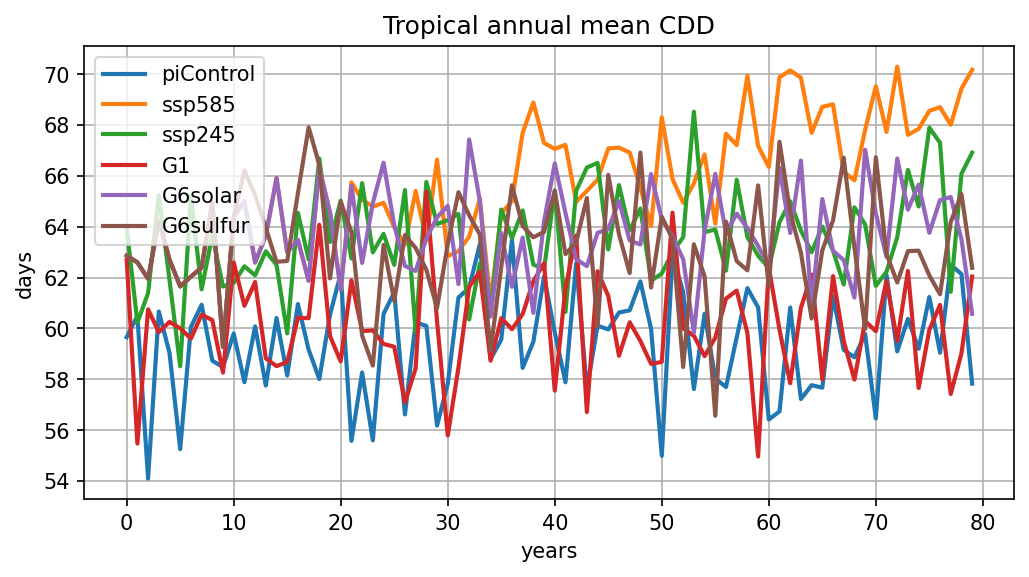

In [14]:
plt.figure(figsize=(8, 4),dpi=150)
plt.plot(global_mean(cdd_picontrol.sel(lat=slice(-20,20))).values,lw=2,label='piControl')
plt.plot(global_mean(cdd_585.sel(lat=slice(-20,20))).values,lw=2,label='ssp585')
plt.plot(global_mean(cdd_245.sel(lat=slice(-20,20))).values,lw=2,label='ssp245')
plt.plot(global_mean(cdd_g1.sel(lat=slice(-20,20))).values,lw=2,label='G1')
plt.plot(global_mean(cdd_solar.sel(lat=slice(-20,20))).values,lw=2,label='G6solar')
plt.plot(global_mean(cdd_sulfur.sel(lat=slice(-20,20))).values,lw=2,label='G6sulfur')
plt.grid()
#plt.ylim([14,22])
plt.ylabel('days')
plt.xlabel('years')
plt.legend()
plt.title('Tropical annual mean CDD')


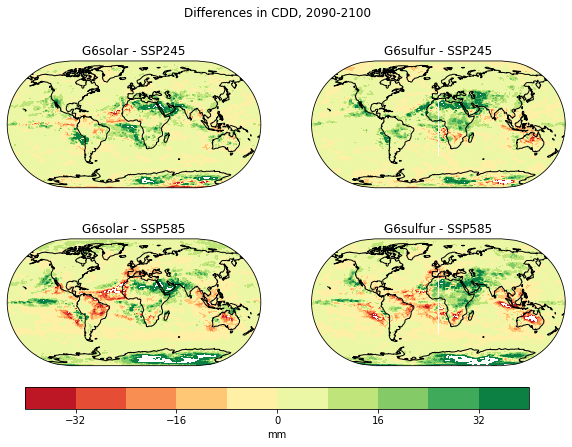

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), subplot_kw={'projection': ccrs.EckertIII()})
cf1 = axs[0,0].contourf(cdd_solar.lon, cdd_solar.lat, cdd_solar.sel(time = slice('2090','2099')).mean('time')-cdd_245.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-40,40,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,0].coastlines()
axs[0,0].set_global()
axs[0,0].set_title("G6solar - SSP245")
cf2 = axs[0,1].contourf(cdd_sulfur.lon, cdd_sulfur.lat, cdd_sulfur.sel(time = slice('2090','2099')).mean('time')-cdd_245.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-40,40,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,1].coastlines()
axs[0,1].set_global()
axs[0,1].set_title("G6sulfur - SSP245")
cf3 = axs[1,0].contourf(cdd_solar.lon, cdd_solar.lat, cdd_solar.sel(time = slice('2090','2099')).mean('time')-cdd_585.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-40,40,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,0].coastlines()
axs[1,0].set_global()
axs[1,0].set_title("G6solar - SSP585")
cf4 = axs[1,1].contourf(cdd_sulfur.lon, cdd_sulfur.lat, cdd_sulfur.sel(time = slice('2090','2099')).mean('time')-cdd_585.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-40,40,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,1].coastlines()
axs[1,1].set_global()
axs[1,1].set_title("G6sulfur - SSP585")
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
fig.colorbar(cf1, orientation='horizontal', label="mm", cax=cbar_ax)
fig.suptitle("Differences in CDD, 2090-2100")

plt.show()

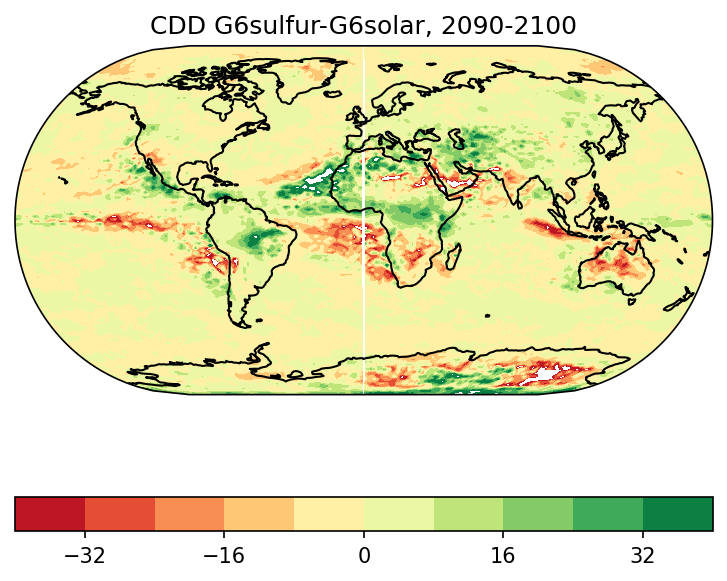

In [30]:
fig = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(cdd_sulfur.lon, cdd_sulfur.lat, cdd_sulfur.sel(time = slice('2090','2099')).mean('time')-cdd_solar.sel(time = slice('2090','2099')).mean('time'), \
                        levels=np.linspace(-40,40,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
fig.colorbar(filled_c, orientation='horizontal')
ax.coastlines()
ax.set_global()
fig.colorbar(cf1, orientation='horizontal', label="mm", cax=cbar_ax)
plt.title('CDD G6sulfur-G6solar, 2090-2100')

plt.show()